In [32]:
import numpy as np
import similaritymeasures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def InitializeCentroids(points, k):
    """
    KMeans聚类算法初始化，随机选择k个点作为初始的聚类中心
    :param points: 样本集
    :param k: 聚类簇数
    :return: 随机选择的k个聚类中心
    """
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def ClosestCentroid(points, centroids):
    """
    计算每个样本与聚类中心的距离（相似度），将其归入最近（最相近）的簇
    :param points: 样本集
    :param centroids: 聚类中心
    :return: 样本所属聚类的簇
    """
    #Dist = (points[:, np.newaxis, :] - centroids[np.newaxis, :, :]).sum(axis=2)
    #return np.argmin(Dist, axis=1)
    
    # 初始化一个数组来保存每个点到各个中心的MSE距离
    distances = np.zeros((len(points), len(centroids)))
    
    # 计算每个点与每个中心的MSE距离
    for i, point in enumerate(points):
        for j, centroid in enumerate(centroids):
            distances[i, j] = similaritymeasures.mse(point, centroid)
    
    # 对于每个点，找到距离最小（相似度最大）的中心索引
    return np.argmin(distances, axis=1)

def UpdateCentroids(points, closestCentroid, centroids):
    """
    对每个簇计算所有点的均值作为新的聚类中心
    :param points: 样本集
    :param closestCentroid: 每个点所属簇的索引
    :param centroids: 上一轮迭代的聚类中心
    :return: 新的聚类中心
    """
    newCentroids = []
    for k in range(centroids.shape[0]):
        # 过滤出属于当前簇k的点
        points_k = points[closestCentroid == k]
        # 检查是否为空簇
        if len(points_k) > 0:
            newCentroids.append(points_k.mean(axis=0))
        else:
            # 如果为空簇，随机选择一个新的中心
            newCentroids.append(points[np.random.randint(0, len(points))])
    return np.array(newCentroids)

def KMeans(points, k=3, maxIters=10):
    """
    KMeans聚类算法实现
    :param points: 样本集
    :param k: 聚类簇数
    :param maxIters: 最大迭代次数
    :return: 聚类后的簇划分
    """
    centroids = InitializeCentroids(points=points, k=k)
    for i in range(maxIters):
        closestCentroid = ClosestCentroid(points=points, centroids=centroids)
        newCentroids = UpdateCentroids(points=points, closestCentroid=closestCentroid, centroids=centroids)
        if (newCentroids == centroids).all():    # 聚类中心不再发生改变，停止迭代
            break
        centroids = newCentroids
    return centroids, closestCentroid, points

# 使用示例
points = np.random.rand(100, 3)  # 生成一些随机的数据点
centroids, closestCentroid, points = KMeans(points, k=2, maxIters=20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


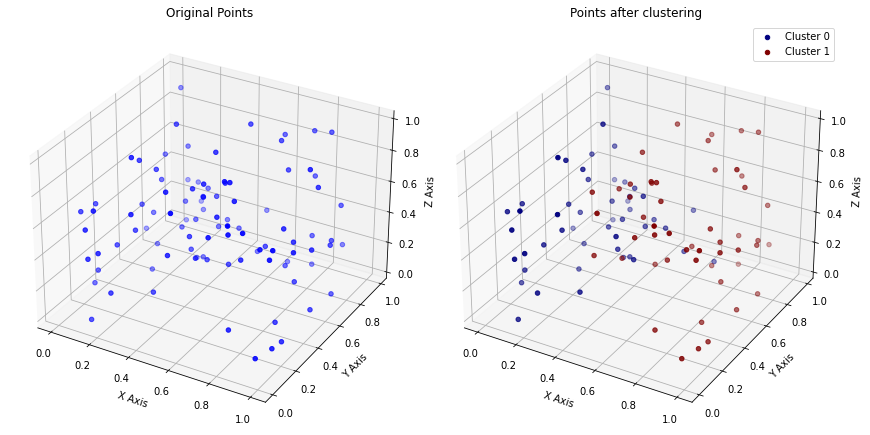

In [34]:
# 创建一个新的matplotlib图形
fig = plt.figure(figsize=(12, 6))

# 第一个子图：可视化原始点
ax1 = fig.add_subplot(121, projection='3d')  # 121 表示分成1行2列，占用第1个位置
ax1.set_title('Original Points')
ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Original Points')

# 第二个子图：可视化聚类后的点
ax2 = fig.add_subplot(122, projection='3d')  # 122 表示分成1行2列，占用第2个位置
ax2.set_title('Points after clustering')
unique_clusters, counts_array = np.unique(closestCentroid, return_counts=True)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))
for cluster, color in zip(unique_clusters, colors):
    cluster_points = points[closestCentroid == cluster]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {cluster}')

# 添加图例到第二个子图
ax2.legend()

# 设置坐标轴标签
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()